# Importing Libraries

Use of Imported Libraries :
* CSV : Handling CSV files 
* String : To get Lowercase alphabets from ascii values 
* numpy : Managing and preprocessing image arrays
* TensorFlow : API to develop and tune Neural Networks 
* Matplotlib.pyplot : Visualization library used for visual aid in data
* ImageDataGenerator : Creates dataset from directory conatiaing images also helps in ImageAugmentations
* Array_to_image : convert numpy array to image

In [2]:
import csv 
import string 
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

# Preprocessing Dataset

You can download data manually from links
* Training data : https://drive.google.com/uc?id=1z0DkA9BytlLxO1C0BAWzknLyQmZAp0HR
* Testing data : https://drive.google.com/uc?id=1z1BIj4qmri59GWBG4ivMNFtpZ4AXIbzg


In [3]:
TRAINING_FILE = 'sign_mnist_train.csv'   #path of training file 
VALIDATION_FILE = 'sign_mnist_test.csv'  #path of testing file

The data is in from of array where 1st column contains labels and then the pixel values of images.

In [4]:
with open(TRAINING_FILE) as training_file:
  line = training_file.readline()
  print(f"First line (header) looks like this:\n{line}")
  line = training_file.readline()
  print(f"Each subsequent line (data points) look like this:\n{line}")

First line (header) looks like this:
label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pix

We need to seperate label and create images from these pixel values

In [5]:
def image_and_label(filename):
    with open(filename, 'r') as file:
        reader = csv.reader(file, delimiter=',')
        labels =[] 
        images =[]
        next(reader)
        for row in reader:
            label = row[0]
            image = row[1:]
            image = np.reshape(image, (28,28))
            labels.append(label)
            images.append(image)
        labels = np.array(labels).astype('float')
        images = np.array(images).astype('float')
        return images, labels

As we have 784 pixels then images will be of 28x28 size.


In [11]:
training_images, training_labels = image_and_label(TRAINING_FILE)
validation_images, validation_labels = image_and_label(VALIDATION_FILE)

# Visualising Dataset

Visualising image.

Label :  6.0


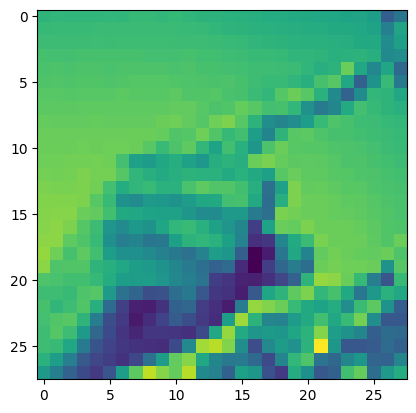

In [8]:
print("Label : ",training_labels[1])
plt.imshow(training_images[1])

Greyscale version :


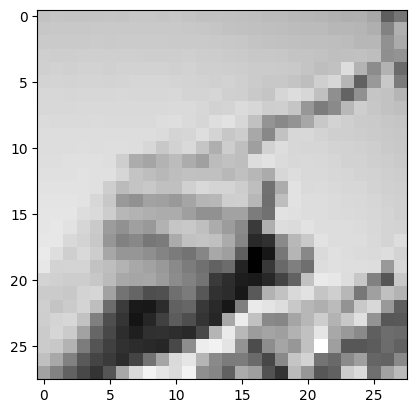

In [9]:
print("Greyscale version :")
plt.imshow(training_images[1], cmap='Greys_r')

The dataset have following dimensions

In [12]:
print(f"Training images has shape : {training_images.shape}")
print(f"Training labels has shape : {training_labels.shape}")
print(f"validation images has shape : {validation_images.shape}")
print(f"validation labels has shape : {validation_labels.shape}")

Training images has shape : (27455, 28, 28)
Training labels has shape : (27455,)
validation images has shape : (7172, 28, 28)
validation labels has shape : (7172,)


We have 27455 images of 28*28 for training while 7172 images for validation.

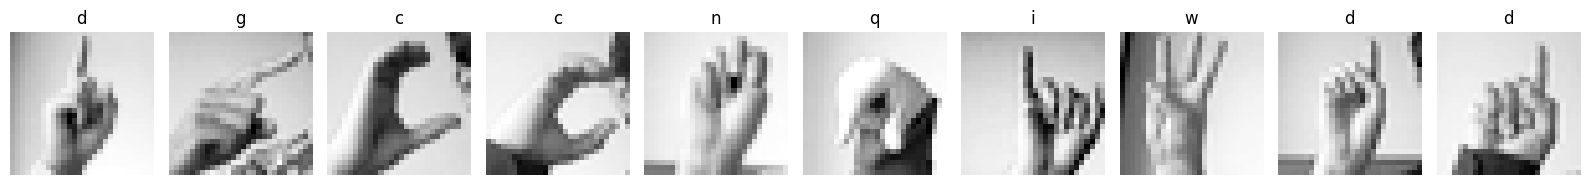

In [13]:
def visualise(training_images, training_labels):
    fig, axes = plt.subplots(1,10, figsize = (16,15))
    axes = axes.flatten()
    letters = list(string.ascii_lowercase)
    for k in range(10):
        img = training_images[k]
        img = np.expand_dims(img, axis = -1)
        img = array_to_img(img)
        ax = axes[k]
        ax.imshow(img, cmap="Greys_r")
        ax.set_title(f"{letters[int(training_labels[k])]}")
        ax.set_axis_off()
    plt.tight_layout()
    plt.show()
visualise(training_images, training_labels)

# Image Augmentation and Generators

Using ImageDataGenerators to perform image augmentations.

In [14]:
def train_val_gen(training_images, training_labels, validation_images, validation_labels):
    training_images = np.expand_dims(training_images, axis = -1)
    validation_images = np.expand_dims(validation_images, axis =-1)
    train_datagen = ImageDataGenerator(
        rescale = 1./255,
        rotation_range = 40,
        width_shift_range = 0.2,
        height_shift_range = 0.2,
        shear_range = 0.2,
        zoom_range = 0.2,
        horizontal_flip = True,
        fill_mode = 'nearest'
    )
    train_generator = train_datagen.flow(x=training_images, y=training_labels, batch_size = 32)
    validation_datagen = ImageDataGenerator(rescale=1./255)
    validation_generator = validation_datagen.flow(x=validation_images, y=validation_labels, batch_size=32)
    return train_generator, validation_generator 

In [15]:
train_generator, validation_generator = train_val_gen(training_images, training_labels, validation_images, validation_labels)


Train and Validation generator should have image dimension as (28x28x1).

In [16]:
print(f"Images of training genrator have shape : {train_generator.x.shape}")
print(f"Labels of training genrator have shape : {train_generator.y.shape}")
print(f"Images of validation genrator have shape : {validation_generator.x.shape}")
print(f"Labels of validation genrator have shape : {validation_generator.y.shape}")

Images of training genrator have shape : (27455, 28, 28, 1)
Labels of training genrator have shape : (27455,)
Images of validation genrator have shape : (7172, 28, 28, 1)
Labels of validation genrator have shape : (7172,)


# Callback

Defining callback we will stop training once reached the required loss levels

In [17]:
loss = 0.3
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('loss')<loss):
            print("\n Loss reached required levels cancelling training")
            self.model.stop_training = True
CAllbacks = myCallback()

# Model Architechture

Model architechture used :
* Convoltion over 2D with 64 filters over (3,3) inputs.
* MaxPooling2D. 
* Convolution over 2D with 32 filter over (3,3) inputs.
* MaxPooling2D.
* Flatten. 
* Dense layer of 256 units with ReLu activation function.
* Dense output layer with 26 units using Softmax activation function.
  

In [18]:
def create_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(26, activation='softmax')
    ])
    model.compile(optimizer=tf.optimizers.Adam(),
                  loss= 'sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Training

In [20]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 800)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

Training the model

In [21]:
history = model.fit(train_generator, epochs=50, validation_data = validation_generator, callbacks= CAllbacks)

Epoch 1/50
858/858 [==============================] - 21s 22ms/step - loss: 2.7674 - accuracy: 0.1591 - val_loss: 1.8071 - val_accuracy: 0.4049
Epoch 2/50
858/858 [==============================] - 18s 21ms/step - loss: 2.0412 - accuracy: 0.3545 - val_loss: 1.4886 - val_accuracy: 0.5004
Epoch 3/50
858/858 [==============================] - 17s 19ms/step - loss: 1.6621 - accuracy: 0.4599 - val_loss: 1.1219 - val_accuracy: 0.6047
Epoch 4/50
858/858 [==============================] - 17s 20ms/step - loss: 1.4189 - accuracy: 0.5386 - val_loss: 0.9441 - val_accuracy: 0.6580
Epoch 5/50
858/858 [==============================] - 17s 20ms/step - loss: 1.2450 - accuracy: 0.5926 - val_loss: 0.7076 - val_accuracy: 0.7596
Epoch 6/50
858/858 [==============================] - 18s 21ms/step - loss: 1.1194 - accuracy: 0.6330 - val_loss: 0.6217 - val_accuracy: 0.7902
Epoch 7/50
858/858 [==============================] - 18s 21ms/step - loss: 1.0171 - accuracy: 0.6665 - val_loss: 0.6538 - val_accuracy:

# Visualizing Results

Visual Representation through charts of acuraccy and loss

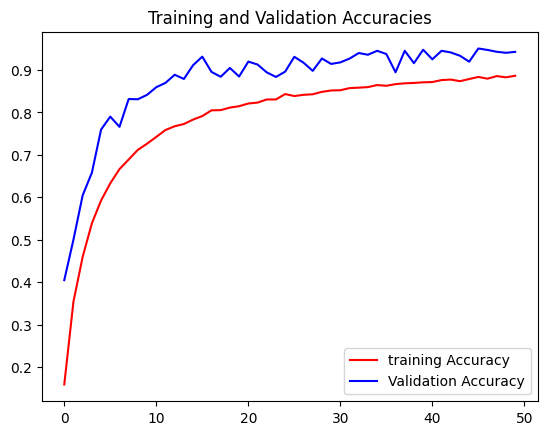

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs =range(len(acc))
plt.plot(epochs, acc, 'r', label="training Accuracy")
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()


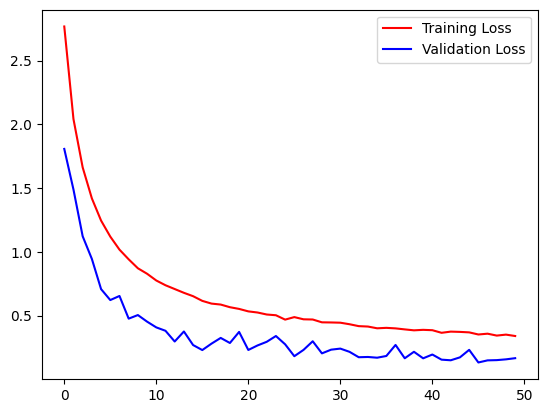

In [23]:
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()

# Testing Results

Testing results on validation set 

In [24]:
pred = model.predict(validation_generator.x)
def show_predict(num):
    letters = list(string.ascii_lowercase)
    res = pred[num]
    img = validation_generator.x[num]
    real = validation_generator.y[num]
    count = 0
    for i in res:
        if(i==1):
            break
        count = count+1
    
    print(f"Predicted label of image : {letters[count]}")
    plt.title("Sign")
    plt.imshow(img)
    plt.show()
    print(f"Image of label {letters[int(real)]}")

225/225 [==============================] - 1s 5ms/step


Predicted label of image : b


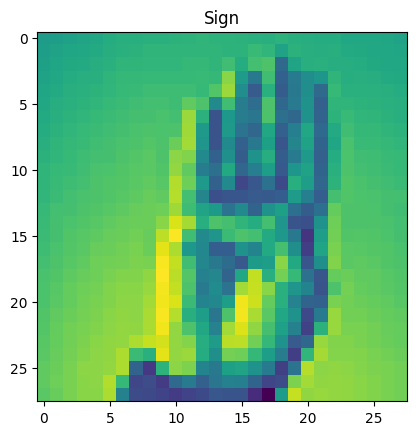

Image of label b


In [26]:
import random
show_predict(random.randint(0,7172))